# Análisis de Ventas y Gastos en una Empresa con 5 Tiendas con Python

<img src="https://logohistory.net/wp-content/uploads/2023/06/Python-Emblem.png" alt="python" style="width: 550px; heigth: 100 px;">

Nombre: Samuel Arteaga López <br>
Módulo: Sistemas de Big Data <br>
Fecha de entrega: 6/02/2025  <br>

# 1. Importación de librerias

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fijar la semilla para reproducibilidad
np.random.seed(123)

# Definir nombres de tiendas y meses
tiendas = ["Tienda de airsoft", "Tienda de juguetes", "Tienda de ropa", "Tienda de electrodomesticos", "Tienda de videojuegos"]
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

Utilizamos `np.random.seedseed()` para que genere siempre los mismos valores aleatorios, creamos un array con las 5 tiendas y en la variable meses almacenamos los nombres de los meses del año

In [25]:
# Generación de datos lógicos para 5 tiendas en 12 meses
df = pd.DataFrame({
    "Mes": np.tile(meses, 5),
    "Tienda": np.repeat(tiendas, 12),
    "Ingresos": np.round(np.random.uniform(50000, 150000, 60), 2),
    "Material": np.round(np.random.uniform(5000, 20000, 60), 2),
    "Personal": np.round(np.random.uniform(20000, 50000, 60), 2),
    "Publicidad": np.round(np.random.uniform(3000, 10000, 60), 2),
    "GastosElectricos": np.round(np.random.uniform(2000, 7000, 60), 2)
})

df.head()

,Mes,Tienda,Ingresos,Material,Personal,Publicidad,GastosElectricos
0,Enero,Tienda de airsoft,119646.92,15039.71,47160.25,6935.53,2027.73
1,Febrero,Tienda de airsoft,78613.93,13789.05,26229.08,3855.70,4424.55
2,Marzo,Tienda de airsoft,72685.15,14373.55,28774.68,4409.80,6941.64
3,Abril,Tienda de airsoft,105131.48,15120.34,35600.30,8681.51,3875.93
4,Mayo,Tienda de airsoft,121946.90,17635.14,47057.34,6275.91,2485.19


La función `repeat()` permite repetir, en este caso los meses del año 5 veces, por otro lado se encuentra la función `uniform()`, de `np.random.uniform` crea números aleatorios uniformemente

In [26]:
# Cálculo de total de gastos y beneficio
df["TotalGastos"] = df[["Material", "Personal", "Publicidad", "GastosElectricos"]].sum(axis=1)
df["Beneficio"] = df["Ingresos"] - df["TotalGastos"]

print("Gastos totales: ")
print(round(df["TotalGastos"].sum(), 2))
print()
print("Beneficio total: ")
print(df["Beneficio"].sum())


Gastos totales: 
3542851.95

Beneficio total: 
2489055.84


Creamos dos nuevas columnas dentro del dataframe df que almacena la suma del total de gastos y el beneficio

In [27]:
# Cálculo de totales globales
totalGlobales = df.groupby("Mes")[["Ingresos", "TotalGastos", "Beneficio", "Material", "Personal", "Publicidad", "GastosElectricos"]].sum().reset_index()

# Cálculo de totales por tienda
totalesTienda = df.groupby(["Tienda", "Mes"])[["Ingresos", "TotalGastos", "Beneficio", "Material", "Personal", "Publicidad", "GastosElectricos"]].sum().reset_index()

print("Total global:")
print(totalGlobales.head())
print()
print("Total de tienda")
print(totalesTienda.head())

Total global:
         Mes   Ingresos  TotalGastos  Beneficio  Material   Personal  \
0      Abril  534575.09    244559.31  290015.78  55156.50  135022.95   
1     Agosto  486930.55    280972.83  205957.72  64267.29  163199.68   
2  Diciembre  564831.65    303228.02  261603.63  77613.73  165800.46   
3      Enero  530332.12    327236.85  203095.27  73409.13  201371.25   
4    Febrero  467505.98    316626.40  150879.58  69021.06  198668.40   

   Publicidad  GastosElectricos  
0    32008.69          22371.17  
1    30064.84          23441.02  
2    38263.76          21550.07  
3    30441.29          22015.18  
4    27131.42          21805.52  

Total de tienda
              Tienda        Mes   Ingresos  TotalGastos  Beneficio  Material  \
0  Tienda de airsoft      Abril  105131.48     63278.08   41853.40  15120.34   
1  Tienda de airsoft     Agosto  118482.97     56156.07   62326.90   8655.00   
2  Tienda de airsoft  Diciembre  122904.97     55353.11   67551.86  18279.90   
3  Tienda de

A continuación, se agrupan los ingresos, gastos y beneficio por mes y se suman

In [28]:
# Identificación de meses clave
ingresosMaximosMes = totalGlobales.loc[totalGlobales["Ingresos"].idxmax(), "Mes"]
ingresosMinimosMes = totalGlobales.loc[totalGlobales["Ingresos"].idxmin(), "Mes"]
beneficioMaximoMes = totalGlobales.loc[totalGlobales["Beneficio"].idxmax(), "Mes"]
beneficioMinimoMes = totalGlobales.loc[totalGlobales["Beneficio"].idxmin(), "Mes"]

print("Mes de máximo ingreso: ")
print(ingresosMaximosMes)
print()
print("Mes de mínimo ingreso: ")
print(ingresosMinimosMes)
print()
print("Mes de máximo beneficio: ")
print(beneficioMaximoMes)
print()
print("Mes de mínimo beneficio: ")
print(beneficioMinimoMes)

Mes de máximo ingreso: 
Diciembre

Mes de mínimo ingreso: 
Junio

Mes de máximo beneficio: 
Abril

Mes de mínimo beneficio: 
Junio


Igual que en la casuística anterior, se agrupan los ingresos, gastos y beneficio pero se agrupan por tienda y mes y se suman 


In [29]:
# Meses clave por tienda
mesesClaveTienda = df.groupby(["Tienda", "Mes"])[["Ingresos", "Beneficio"]].sum().reset_index()
ingresosMaxTienda = mesesClaveTienda.loc[mesesClaveTienda["Ingresos"].idxmax()]
ingresosMinTienda = mesesClaveTienda.loc[mesesClaveTienda["Ingresos"].idxmin()]
beneficioMaxTienda = mesesClaveTienda.loc[mesesClaveTienda["Beneficio"].idxmax()]
beneficioMinTienda = mesesClaveTienda.loc[mesesClaveTienda["Beneficio"].idxmin()]

print("Mes de máximo ingreso: ")
print(ingresosMaxTienda)
print()
print("Mes de mínimo ingreso: ")
print(ingresosMinTienda)
print()
print("Mes de máximo beneficio: ")
print(beneficioMaxTienda)
print()
print("Mes de mínimo beneficio: ")
print(beneficioMinTienda)

Mes de máximo ingreso: 
Tienda       Tienda de electrodomesticos
Mes                            Diciembre
Ingresos                       148555.98
Beneficio                        74555.9
Name: 14, dtype: object

Mes de mínimo ingreso: 
Tienda       Tienda de juguetes
Mes                     Febrero
Ingresos               55967.79
Beneficio             -17590.68
Name: 28, dtype: object

Mes de máximo beneficio: 
Tienda       Tienda de airsoft
Mes                      Julio
Ingresos             148076.42
Beneficio             94027.92
Name: 5, dtype: object

Mes de mínimo beneficio: 
Tienda       Tienda de juguetes
Mes                     Febrero
Ingresos               55967.79
Beneficio             -17590.68
Name: 28, dtype: object


Para sacar los ingresos y beneficios maximos y minimos obtendremos, de todo el total por cada mes, los ingresos y beneficios mas altos y bajos con las funciones min() max() dentro del filtrador which


Igual que hemos hecho para todo el total lo hacemos para cada tienda en especifico obteniendo el maximo y minimo de cada tienda agrupado por esta tienda y el mes 


In [30]:
def calcularModa(x):
    return x.value_counts().idxmax()

Creamos una funcion de calcular moda donde primero nos quedamos con los valores que no estén repetidos, a continuación, con tabulate obtenemos el valor que más se repite el cual se obtiene mediante match, donde x y ux son los mismos elementos dentro del dataframe

In [31]:
ingresosEstadisticas = totalGlobales["Ingresos"].agg(["mean", "median", calcularModa, "std"])
beneficiosEstadisticas = totalGlobales["Beneficio"].agg(["mean", "median", calcularModa, "std"])

estadisticasTienda = df.groupby("Tienda")[["Ingresos", "Beneficio"]].agg(["mean", "median", calcularModa, "std"])


print("Estadísticas globales de ingresos: ")
print(ingresosEstadisticas)
print()
print("Estadísticas globales de beneficio: ")
print(beneficiosEstadisticas)
print()
print("Estadísticas por tienda de beneficio e ingreso: ")
print(estadisticasTienda)

Estadísticas globales de ingresos: 
mean            502658.982500
median          504483.920000
calcularModa    534575.090000
std              38622.289551
Name: Ingresos, dtype: float64

Estadísticas globales de beneficio: 
mean            207421.320000
median          204526.495000
calcularModa    290015.780000
std              52625.125324
Name: Beneficio, dtype: float64

Estadísticas por tienda de beneficio e ingreso: 
                                  Ingresos                           \
                                      mean      median calcularModa   
Tienda                                                                
Tienda de airsoft            104285.177500  101612.335    119646.92   
Tienda de electrodomesticos  106856.491667   99243.550     92635.13   
Tienda de juguetes            98957.699167  103168.950     93857.22   
Tienda de ropa                89571.581667   89380.950    122244.34   
Tienda de videojuegos        102988.032500  103227.655    101948.51   

    

Seguidamente dentro del array ingresos y beneficios estadisticos creamos la media, la mediana, la moda con la función anteriormente comentada y la desviación estándar de los totales globales

Lo mismo para las tiendas pero en este caso creamos una funcion que nos devuelve en un array la media, y el resto de valores agrupados de cada tienda

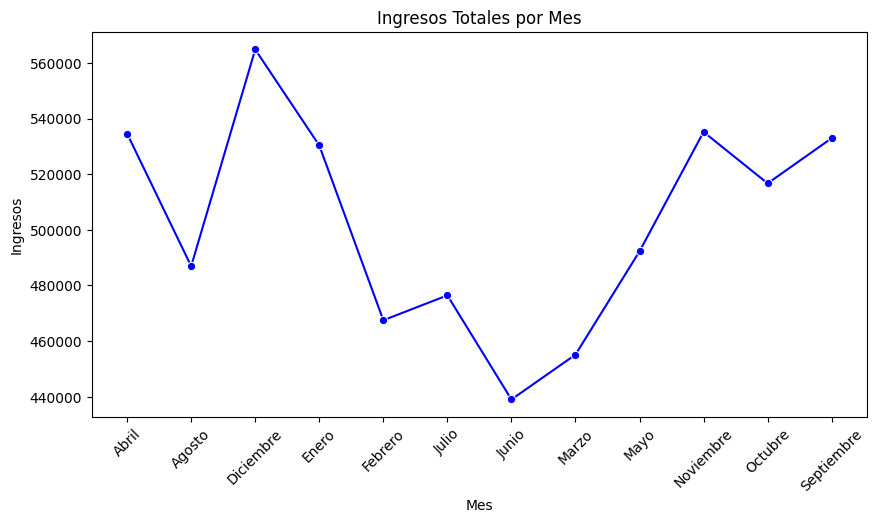

In [32]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=totalGlobales, x="Mes", y="Ingresos", marker="o", color="blue")
plt.xticks(rotation=45)
plt.title("Ingresos Totales por Mes")
plt.xlabel("Mes")
plt.ylabel("Ingresos")
plt.show()

Se observa en el grafico la coincidencia de la salida por pantalla donde se comentaba que el mejor mes era Mayo y el peor, Septiembre a nivel global, vemos que los tres mejores junto a Mayo son Enero y Julio, mientras que los peores son, aparte de Septiembre, Agosto, Octubre y Noviembre. <br>

Los ingresos no son constantes y dependen de factores estacionales o de eventos específicos. Se recomienda identificar qué eventos comerciales impactan en estos ingresos y planificar estrategias para mantener ingresos estables.

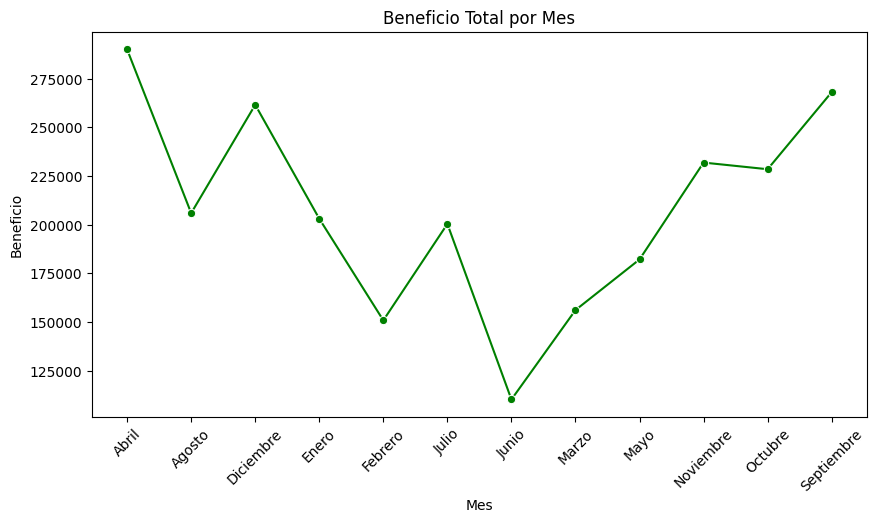

In [33]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=totalGlobales, x="Mes", y="Beneficio", marker="o", color="green")
plt.xticks(rotation=45)
plt.title("Beneficio Total por Mes")
plt.xlabel("Mes")
plt.ylabel("Beneficio")
plt.show()

Similar a los ingresos encontramos que los mejores meses de ingresos son Enero, Mayo y Julio, mientras que los peores son Septiembre, Octubre y Noviembre <br>

El beneficio depende tanto de los ingresos como de la eficiencia en la gestión de costos. Se recomienda analizar los meses con menor beneficio para optimizar gastos operativos.

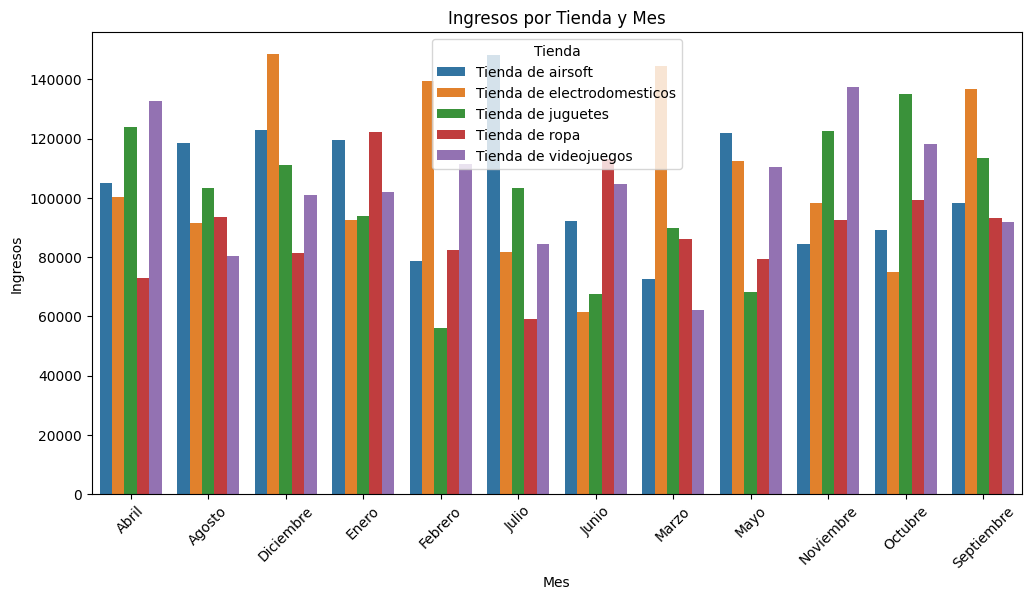

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(data=totalesTienda, x="Mes", y="Ingresos", hue="Tienda")
plt.xticks(rotation=45)
plt.title("Ingresos por Tienda y Mes")
plt.xlabel("Mes")
plt.ylabel("Ingresos")
plt.legend(title="Tienda")
plt.show()

En esta gráfica observamos los ingresos por tienda en los meses del año donde cada tienda tiene su valor más alto según su mes, por ejemplo la tienda de airsoft tiene las peores ventas en noviembre pero las mejores en Junio, esto podría deberse a la temporada alta en verano que en invierno por el buen tiempo para jugar. <br>

Cada tienda tiene su propio patrón de ventas, lo que indica que las estrategias comerciales deben personalizarse según el comportamiento del mercado de cada categoría de producto.

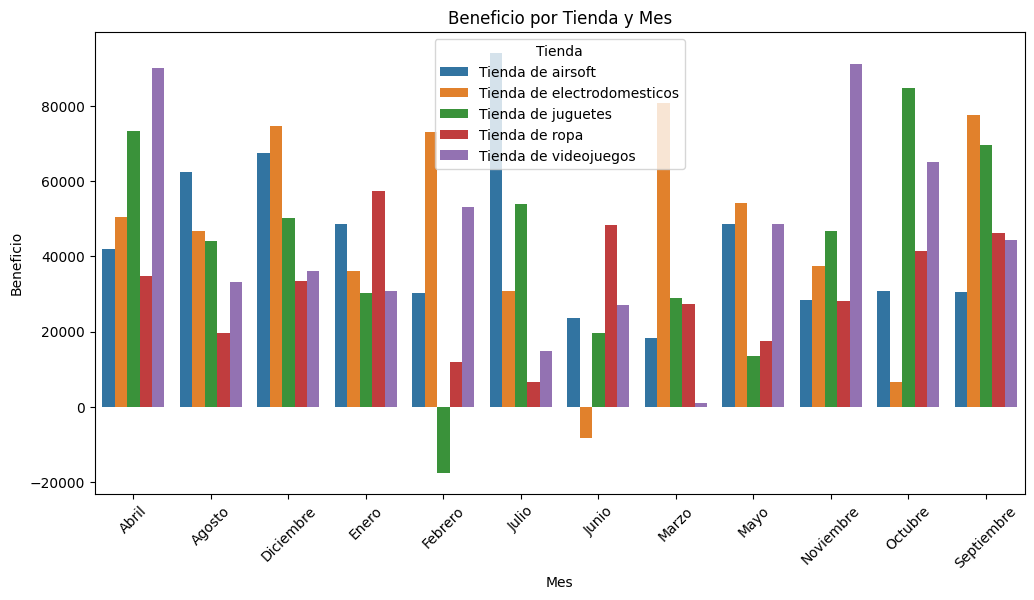

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(data=totalesTienda, x="Mes", y="Beneficio", hue="Tienda")
plt.xticks(rotation=45)
plt.title("Beneficio por Tienda y Mes")
plt.xlabel("Mes")
plt.ylabel("Beneficio")
plt.legend(title="Tienda")
plt.show()

Sin embargo en el beneficio, a contraste con los ingresos vemos tiendas que pierden dinero en algunos meses como es el caso del airsoft donde en temporada baja como meses de Febrero y Noviembre tienen beneficio negativo. <br>

Es fundamental no solo enfocarse en maximizar ingresos, sino en optimizar costos para mejorar los beneficios. Se recomienda realizar un análisis de costos por tienda para mejorar la rentabilidad.